<b>FinanceDataReader 필사

# 여러 종목 가격 한 번에 보기
Source : https://github.com/FinanceData/FinanceDataReader/tree/master/tutorial

In [1]:
# matplotlib rebuild
import matplotlib as mpl

In [2]:
import matplotlib.pyplot as plt
plt.rcParams["font.family"] = 'Malgun Gothic'
plt.rcParams["axes.grid"] = True
plt.rcParams["figure.figsize"] = (12,6)
plt.rcParams["axes.formatter.useoffset"] = False
plt.rcParams['axes.unicode_minus'] = False
plt.rcParams["axes.formatter.limits"] = -10000, 10000

## FinanceDataReader 불러와 한 종목의 가격 가져오기

In [3]:
import FinanceDataReader as fdr

# 이마트
df = fdr.DataReader('139480', '2020-01-01', '2020-12-31')
df.head(15)

,Open,High,Low,Close,Volume,Change
Date,,,,,,
2020-01-02,128000,128000,125500,125500,103554,-0.015686
2020-01-03,126000,126500,122500,122500,169434,-0.023904
2020-01-06,121500,122500,118500,120000,176765,-0.020408
2020-01-07,120500,121500,119500,121000,138060,0.008333
2020-01-08,120500,120500,116500,118000,280257,-0.024793
2020-01-09,119000,120500,118500,120000,212498,0.016949
2020-01-10,119500,121000,118500,119500,269884,-0.004167
2020-01-13,119500,121000,118500,120000,211358,0.004184
2020-01-14,121000,125000,120500,124000,195645,0.033333


## 여러 종목의 종가(Close) 가져오기

In [4]:
stock_list = [
  ["삼성전자", "005930"],
  ["SK하이닉스", "000660"],
  ["현대차", "005380"],
  ["셀트리온", "068270"],
  ["LG화학", "051910"],
  ["POSCO", "005490"],
  ["삼성물산", "028260"],
  ["NAVER", "035420"],
]

In [5]:
import pandas as pd
df_list = [fdr.DataReader(code, '2020-01-01', '2020-12-31')['Close'] for name, code in stock_list]
len(df_list)

8

In [6]:
# pd.concat()으로 합치기

df = pd.concat(df_list, axis = 1)
df.columns = [name for name, code in stock_list]
df.head(10)

,삼성전자,SK하이닉스,현대차,셀트리온,LG화학,POSCO,삼성물산,NAVER
Date,,,,,,,,
2020-01-02,55200,94700,118000,176762,314000,236000,107500,182500
2020-01-03,55500,94500,116000,174307,311000,237000,107500,181500
2020-01-06,55500,94300,116000,169888,307000,231000,106000,180500
2020-01-07,55800,94000,115500,174798,311000,232000,108000,187000
2020-01-08,56800,97400,112000,169888,302000,228000,105000,183000
2020-01-09,58600,99000,111500,173816,306500,234000,106500,186000
2020-01-10,59500,98900,113500,174307,325000,237500,107000,188000
2020-01-13,60000,100500,115000,176271,332500,238500,109000,188000
2020-01-14,60000,100500,116000,174798,333500,242000,107000,190500


<AxesSubplot:xlabel='Date'>

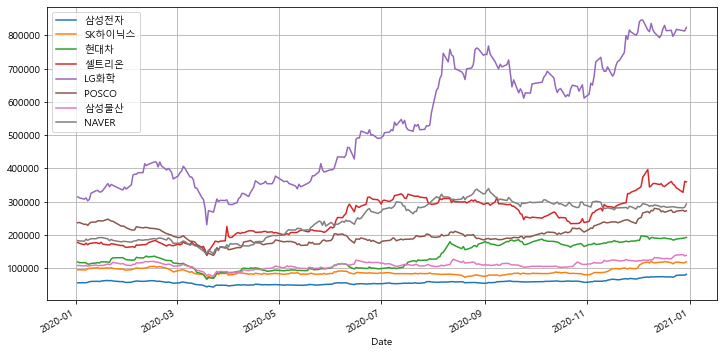

In [7]:
df.plot()

<AxesSubplot:xlabel='Date'>

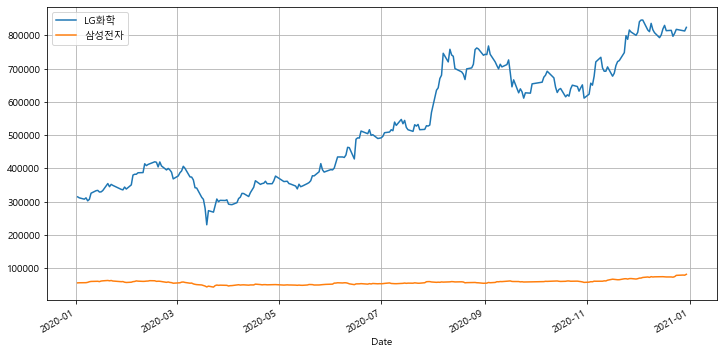

In [8]:
# 두 종목 가격대가 달라 서로 비교하기 어려움
df[['LG화학', '삼성전자']].plot()

<AxesSubplot:xlabel='Date'>

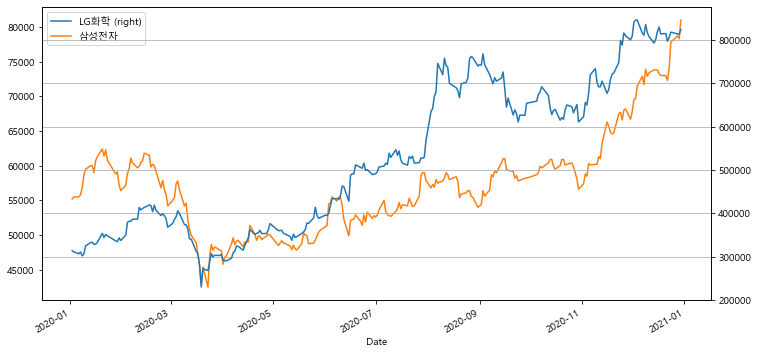

In [9]:
# y컬럼 스케일을 추가로 지정하여 주가 범위가 다른 두 종목 변화 추이를 확인
df[['LG화학', '삼성전자']].plot(secondary_y = ['LG화학'])

<AxesSubplot:xlabel='Date'>

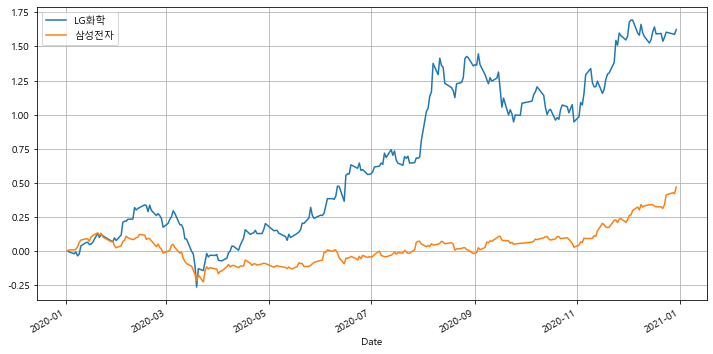

In [10]:
# 시작점을 0으로 동일하게 맞추고 시간에 따른 수익률 확인
# df의 첫번째 행(row)으로 모든 행을 나누고 1.0 빼줌

df2 = df[['LG화학', '삼성전자']]
df_plot = df2 / df2.iloc[0] - 1.0
df_plot.plot()

## 개별 종목의 2020년 수익률 비교

<AxesSubplot:xlabel='Date'>

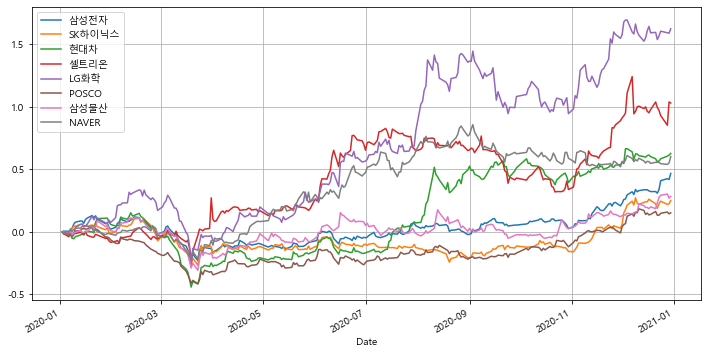

In [11]:
# 전체 종목 성과(performance) 시각화

df_norm = df / df.iloc[0] - 1
df_norm.plot()

In [12]:
# 수익률 큰 종목부터 나열 (마지막 수익률 기준)
df_norm.iloc[-1].sort_values(ascending = False)

LG화학      1.624204
셀트리온      1.030980
현대차       0.627119
NAVER     0.602740
삼성전자      0.467391
삼성물산      0.283721
SK하이닉스    0.251320
POSCO     0.152542
Name: 2020-12-30 00:00:00, dtype: float64

선택된 종목 중 2020년말 기준 가장 높은 수익률을 보인 종목은 LG화학 162.4%, 셀트리온 103.1%이며, 가장 낮은 수익률을 보인 종목은 POSCO 15%, SK하이닉스 25%였음

# 수정 주가(Adjusted Price)
Source : https://github.com/FinanceData/FinanceDataReader/blob/master/tutorial/FinanceDataReader%20Tutorial%20-%20%EC%88%98%EC%A0%95%EC%A3%BC%EA%B0%80.ipynb

수정 주가란? 주식 가격 데이터 연속성 보장을 위해 발행주식수의 변화를 반영한 가격
주가는 보통 종가를 기준으로 하므로 수정주가로 가장 많이 쓰이는 것은 수정종가(Adjusted Close Price)이다.

In [13]:
# 삼성전자 주식을 예시로 보면, 액면분할(2018-05-04) 전의 가격 역시 5만원대
# 현재 시점의 수정주가로 확인할 수 있음

import FinanceDataReader as fdr

df = fdr.DataReader('005930', '2018-04-25', '2018-05-31')
df.head(10)

,Open,High,Low,Close,Volume,Change
Date,,,,,,
2018-04-25,49220,50500,49220,50400,332292,-0.001189
2018-04-26,50420,52160,50400,52140,360931,0.034524
2018-04-27,53380,53639,52440,53000,606216,0.016494
2018-04-30,0,0,0,53000,0,0.000000
2018-05-02,0,0,0,53000,0,0.000000
2018-05-03,0,0,0,53000,0,0.000000
2018-05-04,53000,53900,51800,51900,39565391,-0.020755
2018-05-08,52600,53200,51900,52600,23104720,0.013487
2018-05-09,52600,52800,50900,50900,16128305,-0.032319


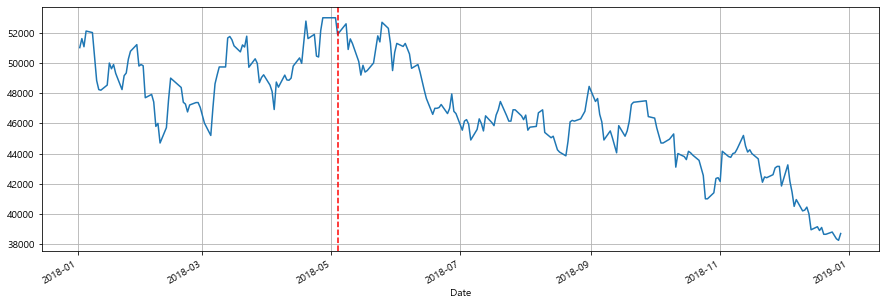

In [14]:
df = fdr.DataReader('005930', '2018-01-01', '2018-12-31')
ax = df['Close'].plot(figsize=(15,5))

ax.axvline('2018-05-04', ls = '--', color = 'r')

# 섹터 평균 수익률과 개별 종목의 수익률
Source : https://github.com/FinanceData/FinanceDataReader/blob/master/tutorial/FinanceDataReader%20Tutorial%20-%20%EC%84%B9%ED%84%B0%20%ED%8F%89%EA%B7%A0%20%EC%88%98%EC%9D%B5%EB%A5%A0%EA%B3%BC%20%EA%B0%9C%EB%B3%84%20%EC%A2%85%EB%AA%A9%EC%9D%98%20%EC%88%98%EC%9D%B5%EB%A5%A0.ipynb

## 한국거래소(KRX)의 전체 종목 가져오기

In [15]:
krx = fdr.StockListing('KRX')
krx

,Symbol,Market,Name,Sector,Industry,ListingDate,SettleMonth,Representative,HomePage,Region
0,060310,KOSDAQ,3S,특수 목적용 기계 제조업,반도체 웨이퍼 캐리어,2002-04-23,03월,"박종익, 김세완 (각자 대표이사)",http://www.3sref.com,서울특별시
1,095570,KOSPI,AJ네트웍스,산업용 기계 및 장비 임대업,"렌탈(파렛트, OA장비, 건설장비)",2015-08-21,12월,이현우,http://www.ajnet.co.kr,서울특별시
2,006840,KOSPI,AK홀딩스,기타 금융업,지주사업,1999-08-11,12월,"채형석, 이석주(각자 대표이사)",http://www.aekyunggroup.co.kr,서울특별시
3,054620,KOSDAQ,APS홀딩스,기타 금융업,인터넷 트래픽 솔루션,2001-12-04,12월,정기로,http://www.apsholdings.co.kr,경기도
4,265520,KOSDAQ,AP시스템,특수 목적용 기계 제조업,디스플레이 제조 장비,2017-04-07,12월,김영주,http://www.apsystems.co.kr,경기도
...,...,...,...,...,...,...,...,...,...,...
6532,000547,KOSPI,흥국화재2우B,NaN,NaN,NaT,NaN,NaN,NaN,NaN
6533,000545,KOSPI,흥국화재우,NaN,NaN,NaT,NaN,NaN,NaN,NaN
6534,003280,KOSPI,흥아해운,해상 운송업,외항화물운송업(케미컬탱커),1976-06-29,12월,이환구,http://www.heung-a.com,서울특별시
6535,037440,KOSDAQ,희림,"건축기술, 엔지니어링 및 관련 기술 서비스업",설계 및 감리용역,2000-02-03,12월,"정영균, 이목운, 허철호, 염두성 (각자대표)",http://www.heerim.com,서울특별시


In [16]:
# 'Sector' 컬럼 기준으로 그룹화
krx.groupby('Sector')

In [17]:
# 그룹화 된 데이터에 통계함수 적용
krx.groupby('Sector').count()

,Symbol,Market,Name,Industry,ListingDate,SettleMonth,Representative,HomePage,Region
Sector,,,,,,,,,
1차 비철금속 제조업,18,18,18,17,18,18,18,17,18
1차 철강 제조업,57,57,57,57,57,57,57,56,57
가구 제조업,8,8,8,8,8,8,8,8,8
가전제품 및 정보통신장비 소매업,2,2,2,2,2,2,2,2,2
가정용 기기 제조업,9,9,9,9,9,9,9,9,9
...,...,...,...,...,...,...,...,...,...
해상 운송업,5,5,5,5,5,5,5,4,5
"해체, 선별 및 원료 재생업",1,1,1,1,1,1,1,1,1
화학섬유 제조업,10,10,10,10,10,10,10,9,10


In [18]:
# Sector별로 종목수를 구하고 가장 종목수 많은 30개 보기
krx.groupby('Sector').count().sort_values('Symbol', ascending = False)[:30]

,Symbol,Market,Name,Industry,ListingDate,SettleMonth,Representative,HomePage,Region
Sector,,,,,,,,,
특수 목적용 기계 제조업,142,142,142,142,142,142,142,132,142
소프트웨어 개발 및 공급업,139,139,139,138,139,139,139,133,139
전자부품 제조업,122,122,122,121,122,122,122,114,122
자동차 신품 부품 제조업,97,97,97,97,97,97,97,94,97
기타 금융업,93,93,93,91,93,93,93,81,93
의약품 제조업,93,93,93,93,93,93,93,90,93
기타 화학제품 제조업,91,91,91,91,91,91,91,83,91
통신 및 방송 장비 제조업,72,72,72,72,72,72,72,65,72
금융 지원 서비스업,72,72,72,71,72,72,72,23,72


In [19]:
# 그룹화 결과를 list와 dict로 변환
sectors = dict(list(krx.groupby('Sector')))

print('count:', len(sectors))
list(sectors.keys())[:10]

count: 158


['1차 비철금속 제조업',
 '1차 철강 제조업',
 '가구 제조업',
 '가전제품 및 정보통신장비 소매업',
 '가정용 기기 제조업',
 '가죽, 가방 및 유사제품 제조업',
 '개인 및 가정용품 임대업',
 '건물 건설업',
 '건물설비 설치 공사업',
 '건축기술, 엔지니어링 및 관련 기술 서비스업']

In [20]:
# 개별 Sector별로 종목리스트 구분할 수 있음
med_sec = sectors['의료용품 및 기타 의약 관련제품 제조업']

print('row count:', len(med_sec))
med_sec.head(10)

row count: 29


,Symbol,Market,Name,Sector,Industry,ListingDate,SettleMonth,Representative,HomePage,Region
2165,138610,KOSDAQ,나이벡,의료용품 및 기타 의약 관련제품 제조업,"치아미백제,치과용 골이식재",2011-07-13,12월,정종평,NaN,충청북도
2222,142280,KOSDAQ,녹십자엠에스,의료용품 및 기타 의약 관련제품 제조업,"혈액백, 진단시약, 혈액투석액",2014-12-17,12월,안은억,http://www.greencrossms.com,경기도
2252,343090,KONEX,단디바이오,의료용품 및 기타 의약 관련제품 제조업,"패혈증 치료제, 면역항암제 전달기술 등",2020-04-24,12월,박영민,http:// www.dandibio.com,서울특별시
2597,233250,KONEX,메디안디노스틱,의료용품 및 기타 의약 관련제품 제조업,동물질병 체외진단키트 및 진단용 시약,2017-06-26,12월,오진식,http://www.mediandiagnostics.com,강원도
2612,059210,KOSDAQ,메타바이오메드,의료용품 및 기타 의약 관련제품 제조업,"생체분해성봉합사,근관충전재",2008-04-15,12월,오석송,http://wwwlmeta-biomed.com,충청북도
3250,206640,KOSDAQ,바디텍메드,의료용품 및 기타 의약 관련제품 제조업,기업인수합병,2014-12-29,12월,최의열,NaN,강원도
3256,064550,KOSDAQ,바이오니아,의료용품 및 기타 의약 관련제품 제조업,"합성유전자,시약및유전자분석장비",2005-12-29,12월,박한오,http://www.bioneer.co.kr,대전광역시
3531,100700,KOSDAQ,세운메디칼,의료용품 및 기타 의약 관련제품 제조업,"의료용구(체액배출기,도뇨관) 제조,도매,수출입",2008-09-30,12월,이재희,http://SEWOONMEDICAL.CO.KR,충청남도
3584,253840,KOSDAQ,수젠텍,의료용품 및 기타 의약 관련제품 제조업,체외진단 기기 및 시약,2019-05-28,12월,손미진,http://www.sugentech.com,대전광역시
3764,096530,KOSDAQ,씨젠,의료용품 및 기타 의약 관련제품 제조업,"호흡기성 병원체 검사제품, 성감염증원인균 검사제품",2010-09-10,12월,천종윤,http://seegene.co.kr,서울특별시


In [21]:
med = pd.DataFrame()

for ix, row in med_sec.iterrows():
  code, name = row['Symbol'], row['Name']
  print(code, name)
    
  # 개별 종목 가격 가져오기
  df = fdr.DataReader(code, '2020-01-01', '2020-12-31')

  # 가격 데이터의 종가(Close)를 컬럼으로 추가
  # (컬럼명은 종목명 지정)
  med[name] = df['Close']

138610 나이벡
142280 녹십자엠에스
343090 단디바이오
233250 메디안디노스틱
059210 메타바이오메드
206640 바디텍메드
064550 바이오니아
100700 세운메디칼
253840 수젠텍
096530 씨젠
246720 아스타
260660 알리코제약
174900 앱클론
950130 엑세스바이오
153710 옵티팜
307280 원바이오젠
246960 이노테라피
086890 이수앱지스
216080 제테마
229000 젠큐릭스
228760 지노믹트리
352770 클리노믹스
340570 티앤엘
046210 파나진
303360 프로테옴텍
241820 피씨엘
304840 피플바이오
042520 한스바이오메드
205470 휴마시스


In [22]:
# 29개 종목 1년간의 종가 데이터 수집
med

,나이벡,녹십자엠에스,단디바이오,메디안디노스틱,메타바이오메드,바디텍메드,바이오니아,세운메디칼,수젠텍,씨젠,...,젠큐릭스,지노믹트리,클리노믹스,티앤엘,파나진,프로테옴텍,피씨엘,피플바이오,한스바이오메드,휴마시스
Date,,,,,,,,,,,,,,,,,,,,,
2020-01-02,11000,5270,NaN,40000,2775,9720,6850,3225,5550,30950,...,16450,24550,NaN,NaN,2345,14100,8040,NaN,24950,1415
2020-01-03,10950,5240,NaN,39900,2820,9590,6710,3220,5450,31500,...,15200,23900,NaN,NaN,2350,13950,8030,NaN,24700,1415
2020-01-06,10550,5040,NaN,39900,2740,9250,6550,3150,5500,30200,...,15850,22550,NaN,NaN,2275,15300,7770,NaN,23850,1355
2020-01-07,10600,5170,NaN,39900,2765,9290,6680,3150,5520,32400,...,15850,22000,NaN,NaN,2290,14250,7890,NaN,23700,1400
2020-01-08,9910,4975,NaN,39900,2575,9030,6320,3025,5210,30900,...,15400,20400,NaN,NaN,2200,13250,7590,NaN,22700,1305
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-12-23,37850,14300,6400.0,47100,2850,23650,17250,6330,21850,186600,...,16350,14100,15500.0,45050.0,4160,9160,32000,54000.0,12150,9670
2020-12-24,38650,14500,6390.0,44000,2820,23700,17500,6230,20150,187700,...,15950,14200,15800.0,44050.0,4120,10050,35450,52200.0,12900,9320
2020-12-28,39700,13900,6400.0,42000,2725,22100,16000,6390,18300,176800,...,15100,13900,16200.0,42050.0,4205,9840,35300,50000.0,12300,9000


In [23]:
# 연간 수익률 구하기 위해 2020년 중 신규상장한 종목 제외 (결측치 포함 컬럼 제외)
med = med.dropna(axis = 1)
med

,나이벡,녹십자엠에스,메디안디노스틱,메타바이오메드,바디텍메드,바이오니아,세운메디칼,수젠텍,씨젠,아스타,...,이노테라피,이수앱지스,제테마,젠큐릭스,지노믹트리,파나진,프로테옴텍,피씨엘,한스바이오메드,휴마시스
Date,,,,,,,,,,,,,,,,,,,,,
2020-01-02,11000,5270,40000,2775,9720,6850,3225,5550,30950,4855,...,13850,6670,10425,16450,24550,2345,14100,8040,24950,1415
2020-01-03,10950,5240,39900,2820,9590,6710,3220,5450,31500,4985,...,14300,6640,10250,15200,23900,2350,13950,8030,24700,1415
2020-01-06,10550,5040,39900,2740,9250,6550,3150,5500,30200,4945,...,13350,6600,10100,15850,22550,2275,15300,7770,23850,1355
2020-01-07,10600,5170,39900,2765,9290,6680,3150,5520,32400,4905,...,13500,6700,10225,15850,22000,2290,14250,7890,23700,1400
2020-01-08,9910,4975,39900,2575,9030,6320,3025,5210,30900,4620,...,12550,6750,9725,15400,20400,2200,13250,7590,22700,1305
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-12-23,37850,14300,47100,2850,23650,17250,6330,21850,186600,5100,...,15750,6950,20600,16350,14100,4160,9160,32000,12150,9670
2020-12-24,38650,14500,44000,2820,23700,17500,6230,20150,187700,5180,...,16000,6910,20200,15950,14200,4120,10050,35450,12900,9320
2020-12-28,39700,13900,42000,2725,22100,16000,6390,18300,176800,4760,...,15000,6880,19650,15100,13900,4205,9840,35300,12300,9000


## 수익률 계산

In [24]:
# 데이터 첫날(1월 2일) 가격을 기준으로 일일 누적 수익률 구하기
acc_rets = med / med.iloc[0] - 1.0
acc_rets

,나이벡,녹십자엠에스,메디안디노스틱,메타바이오메드,바디텍메드,바이오니아,세운메디칼,수젠텍,씨젠,아스타,...,이노테라피,이수앱지스,제테마,젠큐릭스,지노믹트리,파나진,프로테옴텍,피씨엘,한스바이오메드,휴마시스
Date,,,,,,,,,,,,,,,,,,,,,
2020-01-02,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2020-01-03,-0.004545,-0.005693,-0.00250,0.016216,-0.013374,-0.020438,-0.001550,-0.018018,0.017771,0.026777,...,0.032491,-0.004498,-0.016787,-0.075988,-0.026477,0.002132,-0.010638,-0.001244,-0.010020,0.000000
2020-01-06,-0.040909,-0.043643,-0.00250,-0.012613,-0.048354,-0.043796,-0.023256,-0.009009,-0.024233,0.018538,...,-0.036101,-0.010495,-0.031175,-0.036474,-0.081466,-0.029851,0.085106,-0.033582,-0.044088,-0.042403
2020-01-07,-0.036364,-0.018975,-0.00250,-0.003604,-0.044239,-0.024818,-0.023256,-0.005405,0.046850,0.010299,...,-0.025271,0.004498,-0.019185,-0.036474,-0.103870,-0.023454,0.010638,-0.018657,-0.050100,-0.010601
2020-01-08,-0.099091,-0.055977,-0.00250,-0.072072,-0.070988,-0.077372,-0.062016,-0.061261,-0.001616,-0.048404,...,-0.093863,0.011994,-0.067146,-0.063830,-0.169043,-0.061834,-0.060284,-0.055970,-0.090180,-0.077739
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-12-23,2.440909,1.713472,0.17750,0.027027,1.433128,1.518248,0.962791,2.936937,5.029079,0.050463,...,0.137184,0.041979,0.976019,-0.006079,-0.425662,0.773987,-0.350355,2.980100,-0.513026,5.833922
2020-12-24,2.513636,1.751423,0.10000,0.016216,1.438272,1.554745,0.931783,2.630631,5.064620,0.066941,...,0.155235,0.035982,0.937650,-0.030395,-0.421589,0.756930,-0.287234,3.409204,-0.482966,5.586572
2020-12-28,2.609091,1.637571,0.05000,-0.018018,1.273663,1.335766,0.981395,2.297297,4.712439,-0.019567,...,0.083032,0.031484,0.884892,-0.082067,-0.433809,0.793177,-0.302128,3.390547,-0.507014,5.360424


In [25]:
# 장 마지막날 (12월 30일) 수익률 확인
returns = acc_rets.iloc[-1]
returns

나이벡        2.936364
녹십자엠에스     1.979127
메디안디노스틱    0.030000
메타바이오메드    0.012613
바디텍메드      1.438272
바이오니아      1.591241
세운메디칼      0.950388
수젠텍        2.657658
씨젠         5.235864
아스타        0.044284
알리코제약      0.007932
앱클론        0.827284
엑세스바이오     9.400943
옵티팜        0.675854
원바이오젠      1.089010
이노테라피      0.194946
이수앱지스      0.077961
제테마        1.196643
젠큐릭스       0.003040
지노믹트리     -0.403259
파나진        0.835821
프로테옴텍     -0.292908
피씨엘        3.546020
한스바이오메드   -0.456914
휴마시스       5.713781
Name: 2020-12-30 00:00:00, dtype: float64

In [26]:
# 수익률 큰 종목부터 정렬
# 2020년 가장 높은 수익률 보인 종목은 엑세스바이오(940%),
# 가장 낮은 수익률 보인 종목은 한스바이오메드(-45%)로 확인

returns.sort_values(ascending = False)

엑세스바이오     9.400943
휴마시스       5.713781
씨젠         5.235864
피씨엘        3.546020
나이벡        2.936364
수젠텍        2.657658
녹십자엠에스     1.979127
바이오니아      1.591241
바디텍메드      1.438272
제테마        1.196643
원바이오젠      1.089010
세운메디칼      0.950388
파나진        0.835821
앱클론        0.827284
옵티팜        0.675854
이노테라피      0.194946
이수앱지스      0.077961
아스타        0.044284
메디안디노스틱    0.030000
메타바이오메드    0.012613
알리코제약      0.007932
젠큐릭스       0.003040
프로테옴텍     -0.292908
지노믹트리     -0.403259
한스바이오메드   -0.456914
Name: 2020-12-30 00:00:00, dtype: float64

In [27]:
# 21개 종목 평균 수익률 157%
returns.mean()

1.571678583164261

## 다양한 기간 수익률

In [28]:
# 12월 수익률 보기
med2 = med['2020-12-01':'2020-12-30']
med2.head()

,나이벡,녹십자엠에스,메디안디노스틱,메타바이오메드,바디텍메드,바이오니아,세운메디칼,수젠텍,씨젠,아스타,...,이노테라피,이수앱지스,제테마,젠큐릭스,지노믹트리,파나진,프로테옴텍,피씨엘,한스바이오메드,휴마시스
Date,,,,,,,,,,,,,,,,,,,,,
2020-12-01,33950,15600,54000,2900,27050,20900,5910,26000,191500,5050,...,23550,7230,24400,19500,16400,4105,11250,25150,12250,9650
2020-12-02,36700,15450,48000,2945,26150,20050,6100,24900,188000,5410,...,24000,7200,24000,19400,16450,4100,10950,25200,12100,9280
2020-12-03,38400,15100,47000,2945,25500,19500,6030,23900,191300,5280,...,25050,7230,23700,20050,16500,4225,10900,25300,11800,8860
2020-12-04,38300,14750,53000,2855,26550,19300,6460,23050,201600,5470,...,25350,7160,23900,20000,16250,4500,10700,26350,12000,8870
2020-12-07,41600,15400,48000,3040,28200,19850,6270,25900,209300,5300,...,25300,7080,23150,20150,15000,4550,10650,28600,11900,9560


In [29]:
acc_rets = (med2 / med2.iloc[0]) - 1.0
acc_rets.iloc[-1]

나이벡        0.275405
녹십자엠에스     0.006410
메디안디노스틱   -0.237037
메타바이오메드   -0.031034
바디텍메드     -0.123845
바이오니아     -0.150718
세운메디칼      0.064298
수젠텍       -0.219231
씨젠         0.007833
아스타        0.003960
알리코제약      0.125102
앱클론        0.222781
엑세스바이오     0.097015
옵티팜       -0.291375
원바이오젠      0.869919
이노테라피     -0.297240
이수앱지스     -0.005533
제테마       -0.061475
젠큐릭스      -0.153846
지노믹트리     -0.106707
파나진        0.048721
프로테옴텍     -0.113778
피씨엘        0.453280
한스바이오메드    0.106122
휴마시스      -0.015544
Name: 2020-12-30 00:00:00, dtype: float64

In [30]:
# 2020-12-30일을 기준으로 과거 5, 10, 20, 60, 120, 240일 수익률 각각 구해보기
from datetime import datetime, timedelta

the_day = datetime(2020, 12, 30)

for days in [5, 10, 20, 60, 120, 240]:
    start = the_day - timedelta(days)
    end = the_day
    print(start, '~', end)

2020-12-25 00:00:00 ~ 2020-12-30 00:00:00
2020-12-20 00:00:00 ~ 2020-12-30 00:00:00
2020-12-10 00:00:00 ~ 2020-12-30 00:00:00
2020-10-31 00:00:00 ~ 2020-12-30 00:00:00
2020-09-01 00:00:00 ~ 2020-12-30 00:00:00
2020-05-04 00:00:00 ~ 2020-12-30 00:00:00


In [31]:
row_dict = {}
for days in [5, 10, 20, 60, 120, 240]:
  start = the_day - timedelta(days)
  end = the_day

  df = med2[start:end]
  acc_rets = df / df.iloc[0] - 1.0
  row_dict[days] = acc_rets.iloc[-1]

In [32]:
row_dict

{5: 나이벡        0.090680
 녹십자엠에스     0.129496
 메디안디노스틱   -0.019048
 메타바이오메드    0.031193
 바디텍메드      0.072398
 바이오니아      0.109375
 세운메디칼     -0.015649
 수젠텍        0.109290
 씨젠         0.091629
 아스타        0.065126
 알리코제약      0.022140
 앱클론        0.025281
 엑세스바이오     0.122137
 옵티팜        0.138577
 원바이오젠      0.066049
 이노테라피      0.103333
 이수앱지스      0.045058
 제테마        0.165394
 젠큐릭스       0.092715
 지노믹트리      0.053957
 파나진        0.023781
 프로테옴텍      0.013211
 피씨엘        0.035411
 한스바이오메드    0.101626
 휴마시스       0.055556
 Name: 2020-12-30 00:00:00, dtype: float64,
 10: 나이벡        0.022432
 녹십자엠에스     0.082759
 메디안디노스틱    0.030000
 메타바이오메드   -0.078689
 바디텍메드     -0.093690
 바이오니아     -0.065789
 세운메디칼     -0.079063
 수젠텍       -0.161157
 씨젠        -0.047854
 아스타       -0.055866
 알리코제약      0.025774
 앱클론       -0.020134
 엑세스바이오    -0.079332
 옵티팜        0.030508
 원바이오젠      0.250000
 이노테라피     -0.020710
 이수앱지스      0.007003
 제테마        0.119804
 젠큐릭스      -0.051724
 지노믹트리      0.013841
 파나진

In [33]:
df_rets = pd.DataFrame(row_dict)
df_rets

,5,10,20,60,120,240
나이벡,0.090680,0.022432,0.057387,0.275405,0.275405,0.275405
녹십자엠에스,0.129496,0.082759,0.016181,0.006410,0.006410,0.006410
메디안디노스틱,-0.019048,0.030000,-0.053961,-0.237037,-0.237037,-0.237037
메타바이오메드,0.031193,-0.078689,-0.057047,-0.031034,-0.031034,-0.031034
바디텍메드,0.072398,-0.093690,-0.057654,-0.123845,-0.123845,-0.123845
바이오니아,0.109375,-0.065789,-0.080311,-0.150718,-0.150718,-0.150718
세운메디칼,-0.015649,-0.079063,-0.207809,0.064298,0.064298,0.064298
수젠텍,0.109290,-0.161157,-0.139831,-0.219231,-0.219231,-0.219231
씨젠,0.091629,-0.047854,-0.019309,0.007833,0.007833,0.007833
아스타,0.065126,-0.055866,-0.026871,0.003960,0.003960,0.003960


In [34]:
# 섹터 전체 기간별 수익률
df_rets.mean()

5      0.069149
10    -0.002914
20     0.034710
60     0.018939
120    0.018939
240    0.018939
dtype: float64

In [35]:
# 데이터프레임 스타일 바꾸기
def color_negative_red(val):
    color = 'red' if val < 0 else 'black'
    return 'color: %s'%color

def highlight_max(s):
    is_max = s == s.max()
    return ['background-color: yellow' if v else '' for v in is_max]

df_rets.style.applymap(color_negative_red).apply(highlight_max)

,5,10,20,60,120,240
나이벡,0.090680,0.022432,0.057387,0.275405,0.275405,0.275405
녹십자엠에스,0.129496,0.082759,0.016181,0.006410,0.006410,0.006410
메디안디노스틱,-0.019048,0.030000,-0.053961,-0.237037,-0.237037,-0.237037
메타바이오메드,0.031193,-0.078689,-0.057047,-0.031034,-0.031034,-0.031034
바디텍메드,0.072398,-0.093690,-0.057654,-0.123845,-0.123845,-0.123845
바이오니아,0.109375,-0.065789,-0.080311,-0.150718,-0.150718,-0.150718
세운메디칼,-0.015649,-0.079063,-0.207809,0.064298,0.064298,0.064298
수젠텍,0.109290,-0.161157,-0.139831,-0.219231,-0.219231,-0.219231
씨젠,0.091629,-0.047854,-0.019309,0.007833,0.007833,0.007833
아스타,0.065126,-0.055866,-0.026871,0.003960,0.003960,0.003960


In [36]:
# 엑셀로 저장
df_rets.style.\
    applymap(color_negative_red).\
    apply(highlight_max).\
    to_excel('기간별 수익률 데이터_20201230.xlsx', engine = 'openpyxl')

In [37]:
# 저장한 파일 불러와서 확인하기 (서식은 없어짐)
df = pd.read_excel('기간별 수익률 데이터_20201230.xlsx')
df.head()

,Unnamed: 0,5,10,20,60,120,240
0,나이벡,0.090680,0.022432,0.057387,0.275405,0.275405,0.275405
1,녹십자엠에스,0.129496,0.082759,0.016181,0.006410,0.006410,0.006410
2,메디안디노스틱,-0.019048,0.030000,-0.053961,-0.237037,-0.237037,-0.237037
3,메타바이오메드,0.031193,-0.078689,-0.057047,-0.031034,-0.031034,-0.031034
4,바디텍메드,0.072398,-0.093690,-0.057654,-0.123845,-0.123845,-0.123845


# VIX지수와 관련 종목
Source : https://github.com/FinanceData/FinanceDataReader/blob/master/tutorial/FinanceDataReader%20Tutorial%20-%20VIX%20%EC%A7%80%EC%88%98%EC%99%80%20%EA%B4%80%EB%A0%A8%20%EC%A2%85%EB%AA%A9.ipynb

- VIX지수(Volatility Index)는 S&P 500지수 옵션 가격에 대한 향후 30일 동안의 투자 기대치를 지수화 한 것.
- 주식시장 변동성이 커지면 위험을 헤지하기 위해 옵션에 대한 수요가 증가하고 옵션의 가격(프리미엄)이 높아져 VIX가 오르게 됨. VIX 지수가 높다는 것은 곧 시장 참여자들의 시장에 대한 불안감이 크다는 것을 의미. (VIX를 '공포지수'라고도 부르기도)
- VIX가 30(%)이라는 것은 앞으로 한 달간 주가가 30%의 등락을 할 것이라고 예상하는 투자자들이 많다는 것을 의미. 보통 VIX는 보통 30을 기준으로 그보다 높으면 변동성이 높다, 20 이하면 낮다고 함

In [38]:
plt.rcParams["axes.grid"] = True
plt.rcParams["figure.figsize"] = (14, 8)
plt.rcParams["axes.formatter.useoffset"] = False
plt.rcParams['axes.unicode_minus'] = False
plt.rcParams["axes.formatter.limits"] = -10000, 10000

## VIX 가격 데이터(1990~2020)

In [39]:
vix = fdr.DataReader('VIX', '1990-01-01', '2020-12-30') # S&P 500 VIX
vix.iloc[-5:]

,Close,Open,High,Low,Volume,Change
Date,,,,,,
2020-12-24,21.53,22.47,22.83,21.39,0.0,-0.0764
2020-12-25,21.53,21.53,21.53,21.53,0.0,0.0000
2020-12-28,21.70,22.11,22.12,21.15,0.0,0.0079
2020-12-29,23.08,21.61,23.72,20.99,0.0,0.0636
2020-12-30,22.77,22.58,23.15,22.41,0.0,-0.0134


In [40]:
# 2020-03-09의 VIF지수 54.46은 세계금융위기 이후 최고치
vix.loc['2020-03-04':'2020-03-12']

,Close,Open,High,Low,Volume,Change
Date,,,,,,
2020-03-04,31.99,34.44,35.58,30.30,0.0,-0.1312
2020-03-05,39.62,33.61,42.84,33.54,0.0,0.2385
2020-03-06,41.94,41.46,54.39,40.84,0.0,0.0586
2020-03-09,54.46,41.94,62.12,41.94,0.0,0.2985
2020-03-10,47.30,49.68,55.66,43.56,0.0,-0.1315
2020-03-11,53.90,52.24,55.82,49.98,0.0,0.1395
2020-03-12,75.47,61.46,76.83,59.91,0.0,0.4002


Text(2020-03-09, 54.46, '54.46')

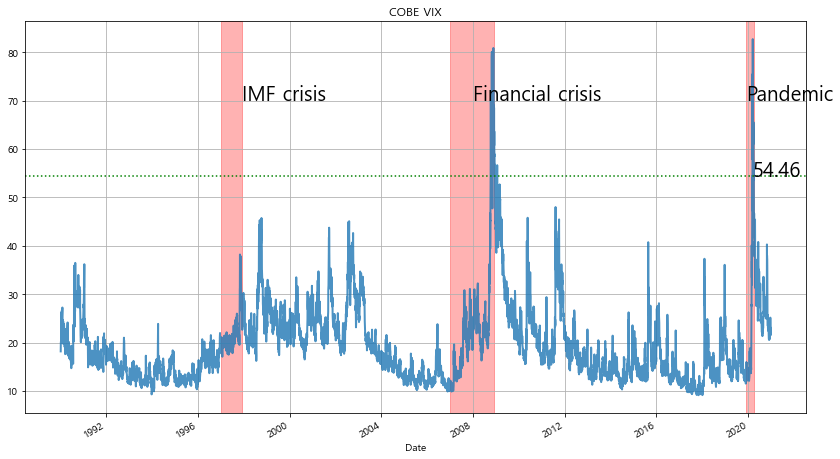

In [41]:
# VIX index
ax = vix['Close'].plot(lw=2, alpha=0.8, title='COBE VIX')

# 외환위기
ax.axvspan('1997-01', '1997-12', alpha=0.3, color='red') 
ax.annotate('IMF crisis', xy=('1997-12-03', 70), fontsize=20)

# 금융위기
ax.axvspan('2007-01', '2008-12', alpha=0.3, color='red') 
ax.annotate('Financial crisis', xy=('2008', 70), fontsize=20) 

# 팬데믹
ax.axvspan('2019-12', '2020-04', alpha=0.3, color='red') 
ax.annotate('Pandemic', xy=('2019-12', 70), fontsize=20) 

# 2020-03-09
ax.axhline(54.46, ls=':', c='g')
ax.annotate('54.46', xy=('2020-03-09', 54.46), fontsize=20)

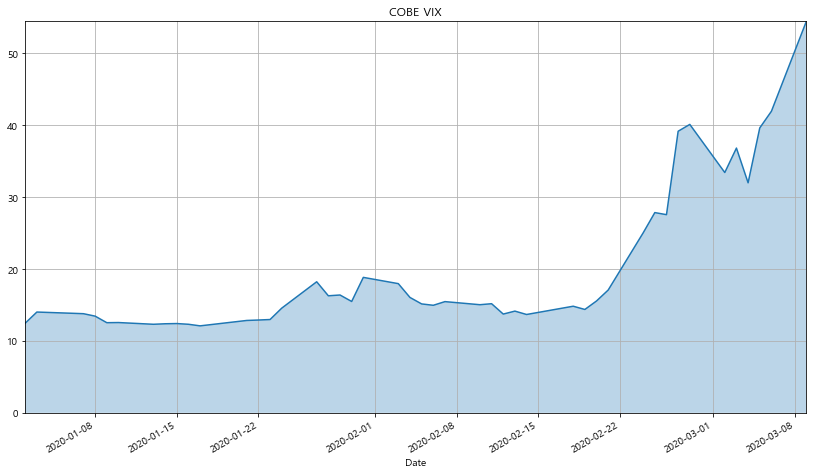

In [42]:
# 2020 1~3월 VIX 확인하기
values = vix['2020-01-01':'2020-03-09']['Close']

ax = values.plot(figsize=(14,8), grid=True, title='COBE VIX')
ax.fill_between(values.index, 0, values, alpha=0.3)
ax.margins(0)

## VIX지수, S&P500지수, KOSPI지수 데이터

In [43]:
# S&P 500 VIX
vix = fdr.DataReader('VIX', '2010-01-01', '2020-03-09')

# KOSPI index
kospi = fdr.DataReader('KS11', '2010-01-01', '2020-03-09')

# S&P 500 index
sp500 = fdr.DataReader('US500', '2010-01-01', '2020-03-09') 

In [44]:
df = pd.concat([vix['Close'], kospi['Close'], sp500['Close']], axis=1)
df.columns = ['VIX', 'KOSPI', 'S&P500']

<AxesSubplot:xlabel='Date'>

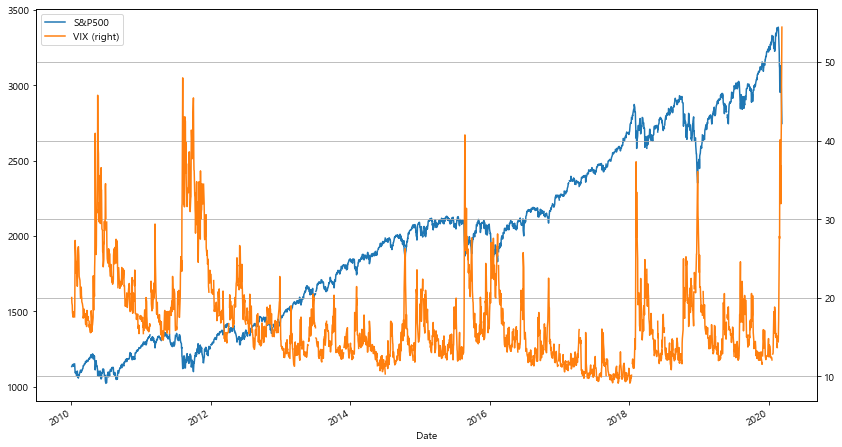

In [45]:
# S&P 500지수와 VIX지수
df[['S&P500', 'VIX']].plot(secondary_y='VIX')

<AxesSubplot:xlabel='Date'>

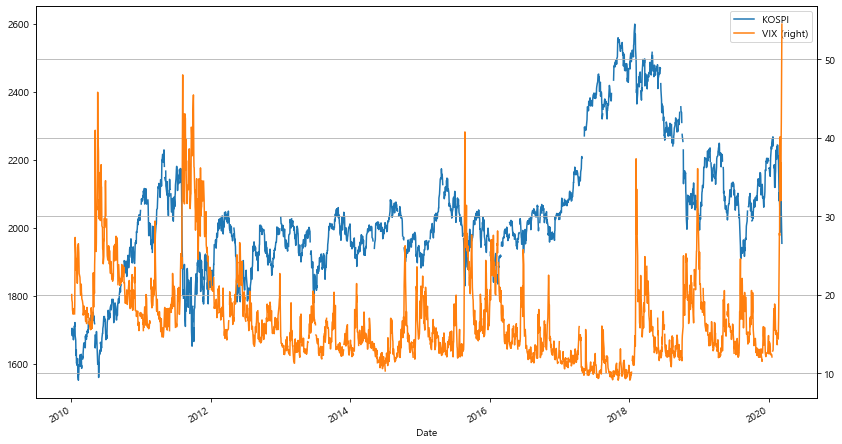

In [46]:
# KOSPI지수와 VIX지수
df[['KOSPI', 'VIX']].plot(secondary_y='VIX')

## VIX지수, S&P500지수, KOSPI지수 상관관계

In [47]:
df.corr()

,VIX,KOSPI,S&P500
VIX,1.000000,-0.514774,-0.439172
KOSPI,-0.514774,1.000000,0.704733
S&P500,-0.439172,0.704733,1.000000


KOSPI지수와 S&P500지수의 상관계수는 0.70으로 매우 높음 <br>
VIX지수의 경우 S&P500지수와는 -0.439, KOSPI지수와는 -0.514로 역상관 관계 <br>
VIX지수에 배팅한다는 것은 주식시장의 하락에 배팅을 한다는 의미

## VIX 관련 종목

국내 VIX관련 ETN
- 530065: 삼성 S&P500 VIX S/T 선물 ETN(H) B
- 500045: 신한 S&P500 VIX S/T 선물 ETN B
- 550058: QV S&P500 VIX S/T 선물 ETN B

해외선물
- VX: S&P 500 VIX 선물 (해외선물)

미국 ETF
- VXX: iPath Series B S&P 500 VIX Short-Term Futures ETN (NYSE)
- VIXY: ProShares VIX Short-Term Futures ETF (NYSE)
- VIXM: ProShares VIX Mid-Term Futures ETF (NYSE)
- VIIX: VelocityShares Daily Long VIX Short-Term ETN (NASDAQ)
- VXZ: iPath Series B S&P 500® VIX Mid-Term Futures ETN (NYSE)
- XVZ: iPath S&P 500 Dynamic VIX ETN (NYSE)
- EVIX: VelocityShares 1X Long VSTOXX Futures ETN (NYSE)

## S&P 500 VIX 선물 (해외선물)

<AxesSubplot:xlabel='Date'>

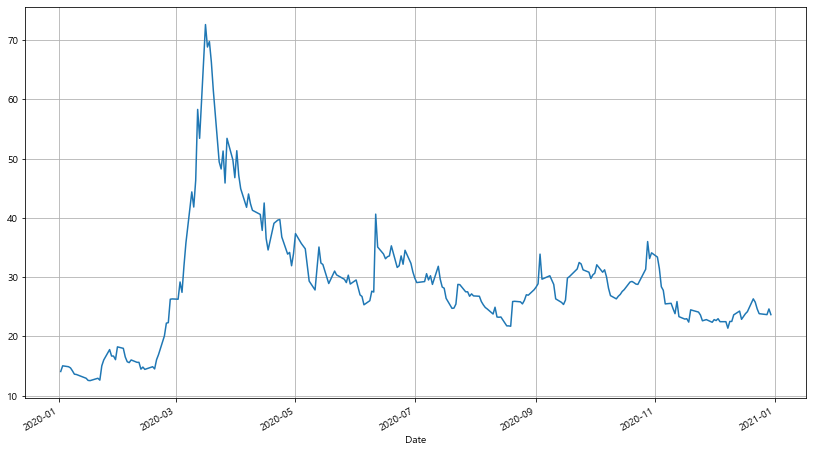

In [48]:
fdr.DataReader('VX', '2020-01-01', '2020-12-30')['Close'].plot()

삼성 S&P500 VIX S/T 선물 ETN(H) B (코스피, 530065) <br>
https://finance.naver.com/item/main.nhn?code=530065

In [49]:
fdr.DataReader('530065', '2020-01-01', '2020-03-09').tail(5)

,Open,High,Low,Close,Volume,Change
Date,,,,,,
2020-03-03,16395,17365,16310,17190,26338,0.020784
2020-03-04,18585,19000,17600,17775,35725,0.034031
2020-03-05,17750,18260,17750,18135,14610,0.020253
2020-03-06,19775,21385,19350,20975,40049,0.156603
2020-03-09,27220,27265,26225,27265,69397,0.299881


<AxesSubplot:xlabel='Date'>

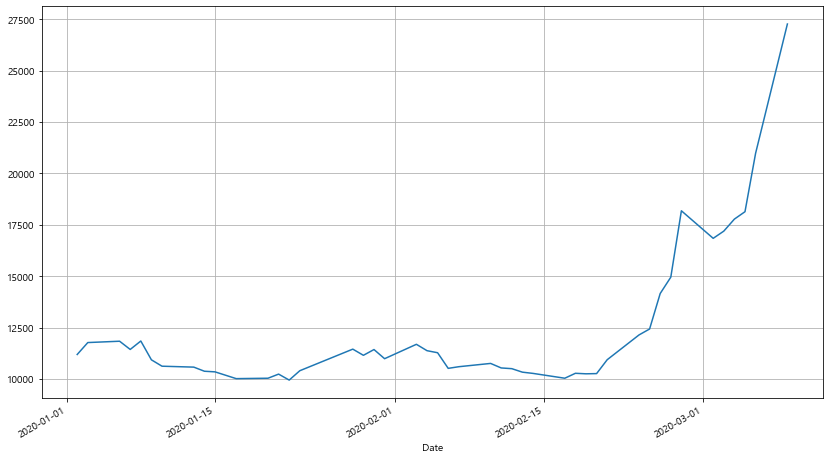

In [50]:
fdr.DataReader('530065', '2020-01-01', '2020-03-09')['Close'].plot()

In [51]:
price = fdr.DataReader('530065', '2020-01-01', '2020-03-09')['Close']

<AxesSubplot:xlabel='Date'>

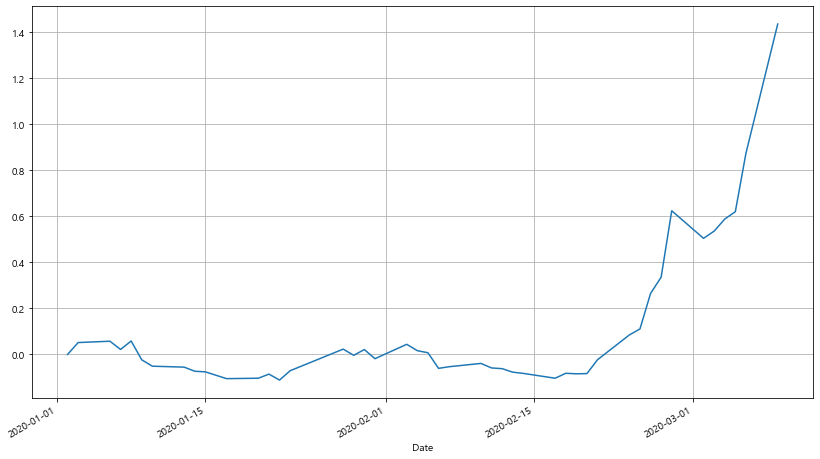

In [52]:
returns = price / price[0] - 1.0
returns.plot()

In [53]:
# 2020-03-09일에 연초대비 143.6% 수익률 기록
returns[-1]

1.436550491510277

# FRED 경기 선행 지표
Source : https://github.com/FinanceData/FinanceDataReader/blob/master/tutorial/FinanceDataReader%20Tutorial%20-%20FRED%20%EA%B2%BD%EA%B8%B0%20%EC%84%A0%ED%96%89%20%EC%A7%80%ED%91%9C.ipynb

In [54]:
# 나스닥 지수 확인
df = fdr.DataReader('NASDAQCOM', data_source='fred')
df

,NASDAQCOM
DATE,
1971-02-05,100.00
1971-02-08,100.84
1971-02-09,100.76
1971-02-10,100.69
1971-02-11,101.45
...,...
2021-02-10,13972.53
2021-02-11,14025.77
2021-02-12,14095.47


<AxesSubplot:xlabel='DATE'>

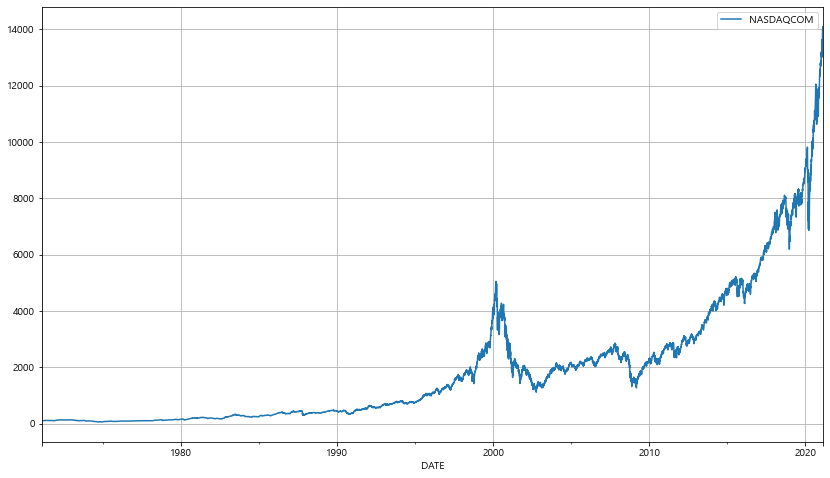

In [55]:
df.plot()

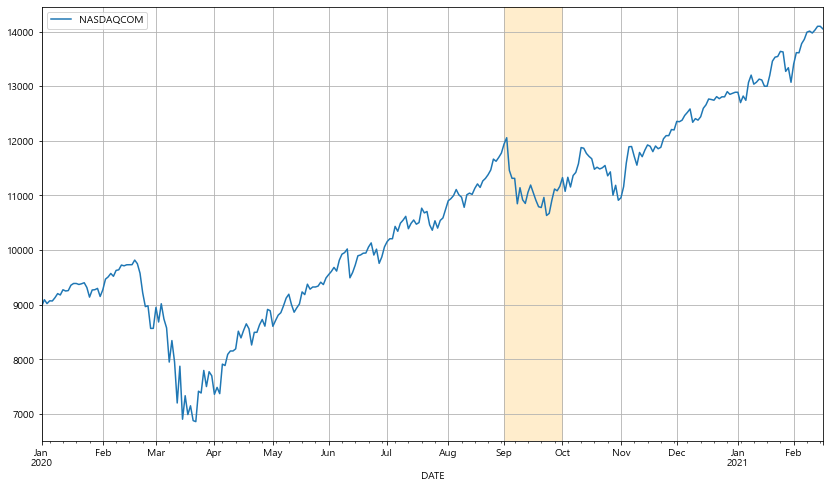

In [56]:
# 팬데믹 이후 상승하던 나스닥은 9~11월 조정받다가 다시 상승세
ax = df['2020':].plot()
ax = ax.axvspan('2020-09-01', '2020-10-01', color='orange', alpha=0.2)

## 주간 실업수당 청구 건수 (ICSA)
https://fred.stlouisfed.org/series/ICSA

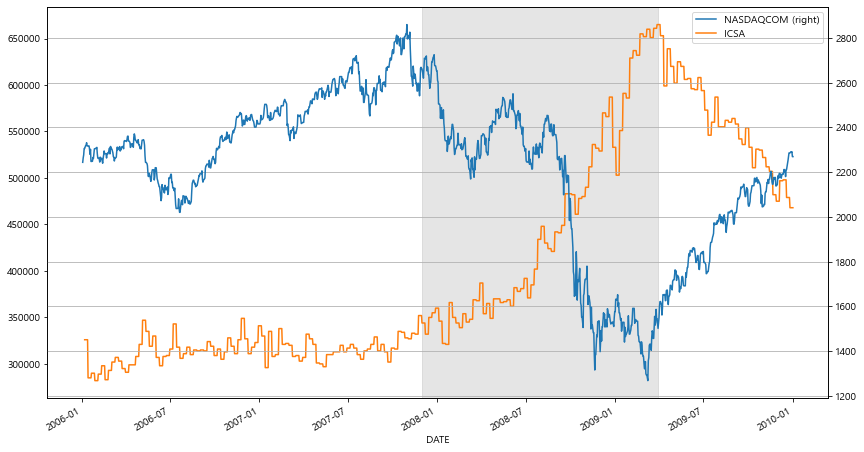

In [57]:
# 2008년 금융위기 나스닥지수(NASDAQCOM)와 주간 실업수당 청구 건수(ICSA)

df = fdr.DataReader(['NASDAQCOM', 'ICSA'], start='2006', end='2010', data_source='fred')
ax = df.plot(secondary_y='NASDAQCOM')
ax = ax.axvspan('2007-12-01', '2009-03-30', color='gray', alpha=0.2)

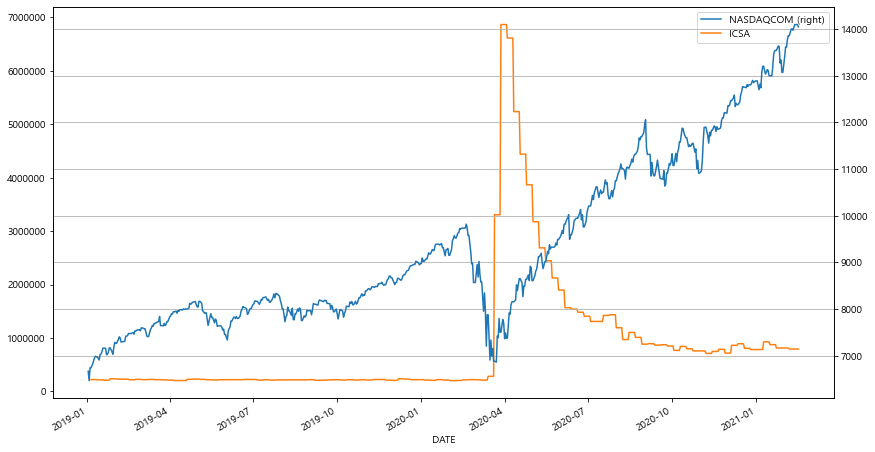

In [58]:
# 최근(2021년 1월), 나스닥지수(NASDAQCOM)와 주간 실업수당 청구 건수(ICSA)
# 팬데믹 이후 최저치 기록

df = fdr.DataReader(['NASDAQCOM', 'ICSA'], start='2019', data_source='fred')
ax = df.plot(secondary_y='NASDAQCOM')

In [59]:
df.tail()

,NASDAQCOM,ICSA
DATE,,
2021-02-10,13972.53,793000.0
2021-02-11,14025.77,793000.0
2021-02-12,14095.47,793000.0
2021-02-15,14095.47,793000.0
2021-02-16,14047.50,793000.0


## 소비자심리지수 (UMCSENT)
https://fred.stlouisfed.org/series/UMCSENT <br>
소비자 설문 결과를 수치화한 지표로 100이상이면 긍정적, 100이하면 부정적으로 봄

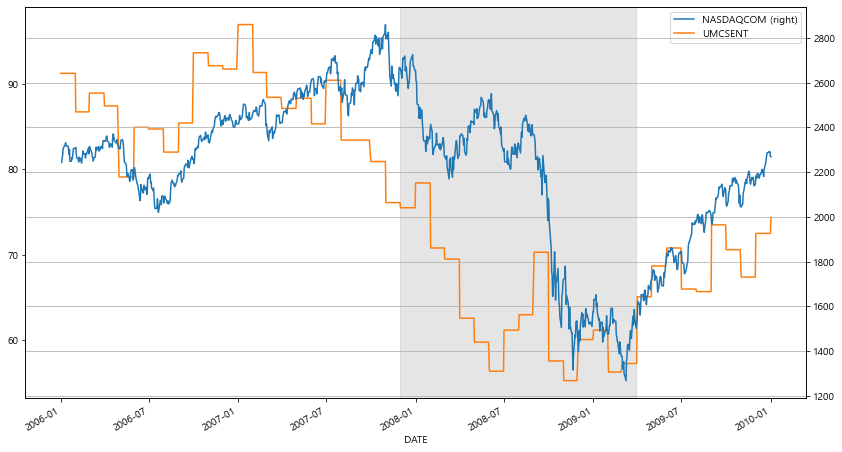

In [60]:
# 2008년 금융위기 나스닥지수(NASDAQCOM)와 미시건대 소비자심리지수(UMCSENT) 
# 소비자심리지수가 먼저 하락

df = fdr.DataReader(['NASDAQCOM', 'UMCSENT'], start='2006', end='2010', data_source='fred')
ax = df.plot(secondary_y='NASDAQCOM')
ax = ax.axvspan('2007-12-01', '2009-03-30', color='gray', alpha=0.2)

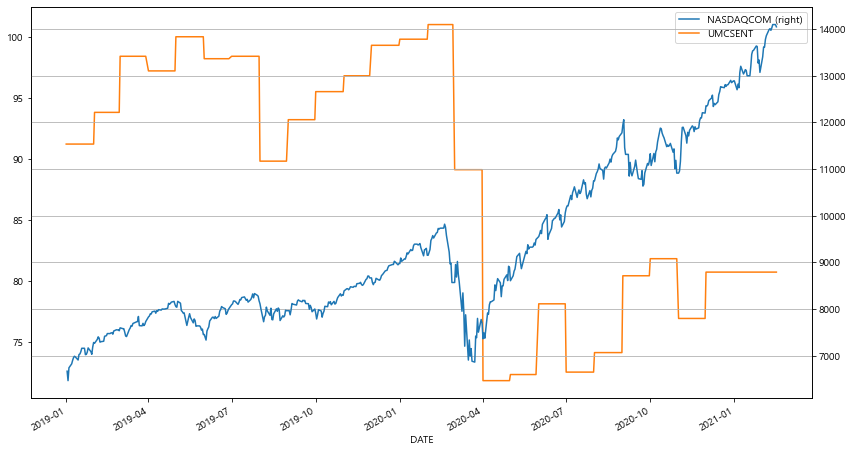

In [61]:
# 최근(2021년 1월), 나스닥지수(NASDAQCOM)와 미시건대 소비자심리지수(UMCSENT) 
# 소비자심리지수는 나스닥만큼 회복되지 않음. 경기에 대해 다소 부정적인 신호

df = fdr.DataReader(['NASDAQCOM', 'UMCSENT'], start='2019', data_source='fred')
ax = df.plot(secondary_y='NASDAQCOM')

In [62]:
df.tail()

,NASDAQCOM,UMCSENT
DATE,,
2021-02-10,13972.53,80.7
2021-02-11,14025.77,80.7
2021-02-12,14095.47,80.7
2021-02-15,14095.47,80.7
2021-02-16,14047.50,80.7


## 주택 판매 지수 (HSN1F)
https://fred.stlouisfed.org/series/HSN1F <br>
주택시장 활성화 정도. 불황으로 주가가 하락할 때 주택 판매 지수 먼저 하락

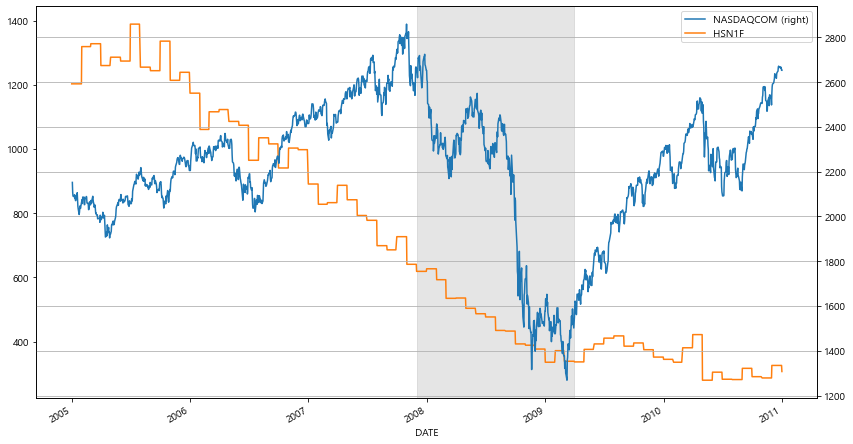

In [63]:
# 2008년 금융위기 나스닥지수(NASDAQCOM)와 주택 판매 지수

df = fdr.DataReader(['NASDAQCOM', 'HSN1F'], start='2005', end='2011', data_source='fred')
ax = df.plot(secondary_y='NASDAQCOM')
ax = ax.axvspan('2007-12-01', '2009-03-30', color='gray', alpha=0.2)

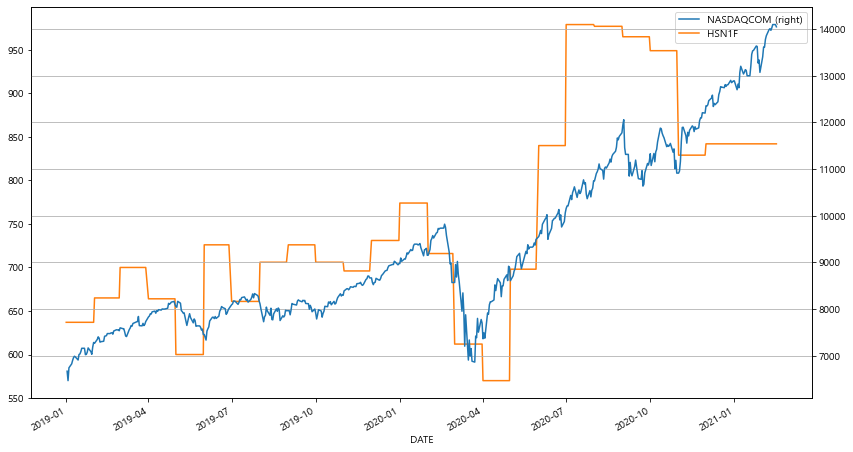

In [64]:
# 최근(2021년 1월), 나스닥지수(NASDAQCOM)와 주택판매지수(HSN1F) 
# 팬데믹때는 동반 하락하였으며, 주택판매지수는 나스닥과 함께 회복되다가 2020년 7월경부터 다시 하락

df = fdr.DataReader(['NASDAQCOM', 'HSN1F'], start='2019', data_source='fred')
ax = df.plot(secondary_y='NASDAQCOM')

## 실업률 (UNRATE)
https://fred.stlouisfed.org/series/UNRATE <br>
불황에는 후행지표, 경기회복에 동행지표

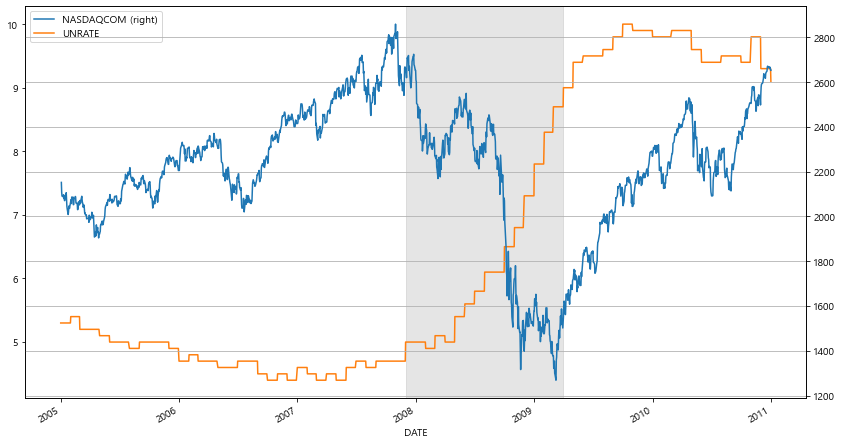

In [65]:
# 2008년 금융위기 나스닥지수(NASDAQCOM)와 실업률(UNRATE) 

df = fdr.DataReader(['NASDAQCOM', 'UNRATE'], start='2005', end='2011', data_source='fred')
ax = df.plot(secondary_y='NASDAQCOM')
ax = ax.axvspan('2007-12-01', '2009-03-30', color='gray', alpha=0.2)

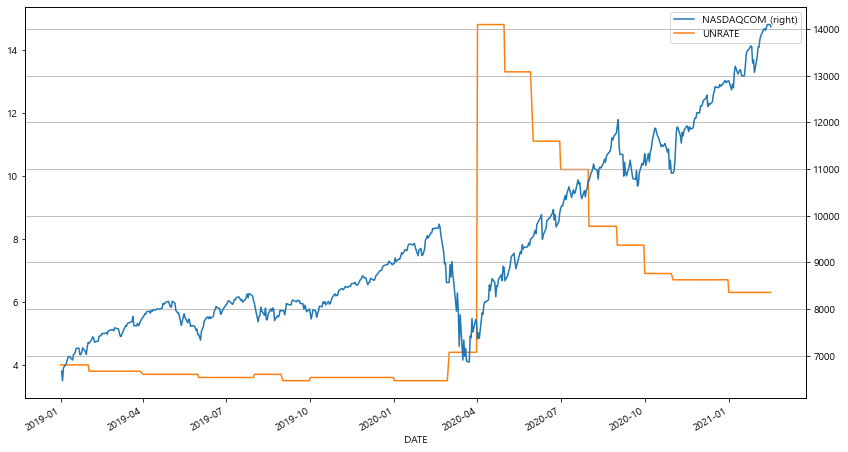

In [66]:
# 최근(2021년 1월), 나스닥지수(NASDAQCOM)와 실업률(UNRATE) 
# 실업률은 팬데믹때 급상승했다가 점차 하락중

df = fdr.DataReader(['NASDAQCOM', 'UNRATE'], start='2019', data_source='fred')
ax = df.plot(secondary_y='NASDAQCOM')

## M2 통화량(M2)
https://fred.stlouisfed.org/series/M2

시중 돈이 얼마나 많이 풀렸는지(유동성) 보여주는 지표

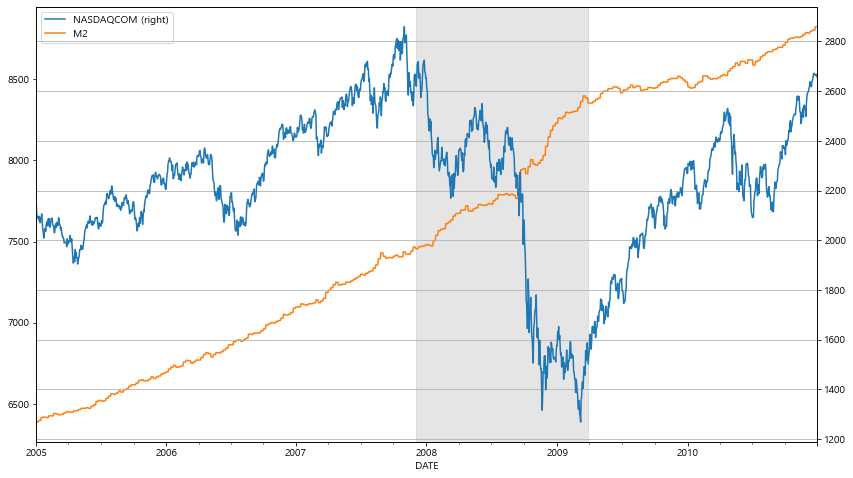

In [67]:
# 2008년 금융위기, 나스닥지수(NASDAQCOM)와 M2통화량(M2) 

df = fdr.DataReader(['NASDAQCOM', 'M2'], start='2005', end='2011', data_source='fred')
ax = df.plot(secondary_y='NASDAQCOM')
ax = ax.axvspan('2007-12-01', '2009-03-30', color='gray', alpha=0.2)

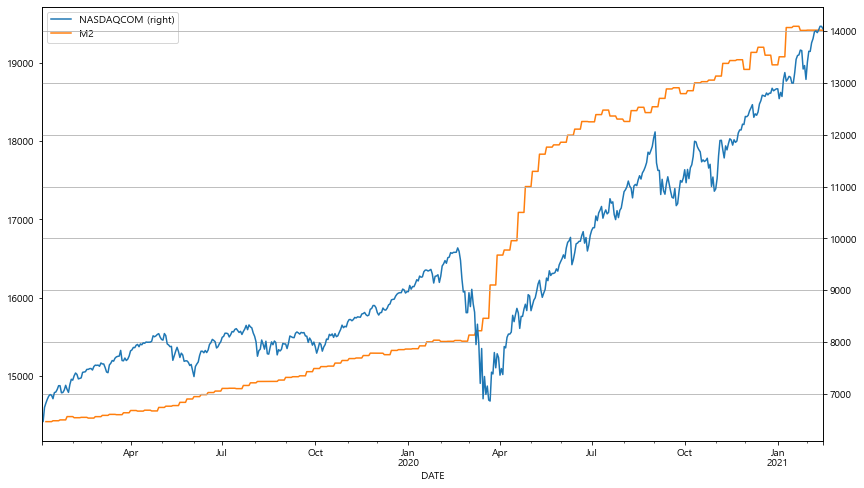

In [68]:
# 최근(2021년 1월), 나스닥지수(NASDAQCOM)와 M2통화량(M2)

df = fdr.DataReader(['NASDAQCOM', 'M2'], start='2019', data_source='fred')
ax = df.plot(secondary_y='NASDAQCOM')

## 하이일드 채권 스프레드 (BAMLH0A0HYM2)
https://fred.stlouisfed.org/series/BAMLH0A0HYM2

낮은 신용등급 회사에 투자하는 고위험, 고수익 채권. 스프레드는 국채 수익률과의 차이를 의미하며 불황일 수록 하이일드 채권 스프레드는 더 커짐.

하이일드 채권 스프레드 = 하이일드 채권 수익률 – 국채 수익률

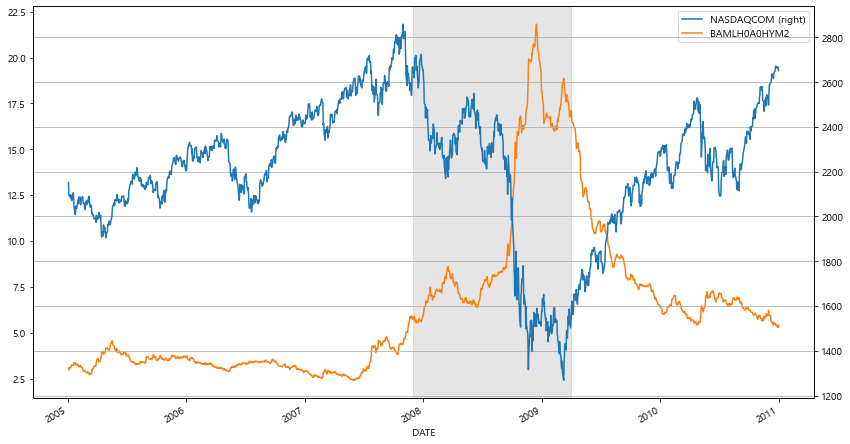

In [69]:
# 2008년 금융위기, 나스닥지수(NASDAQCOM)와 하이일드 채권 스프레드 

df = fdr.DataReader(['NASDAQCOM', 'BAMLH0A0HYM2'], start='2005', end='2011', data_source='fred')
ax = df.plot(secondary_y='NASDAQCOM')
ax = ax.axvspan('2007-12-01', '2009-03-30', color='gray', alpha=0.2)

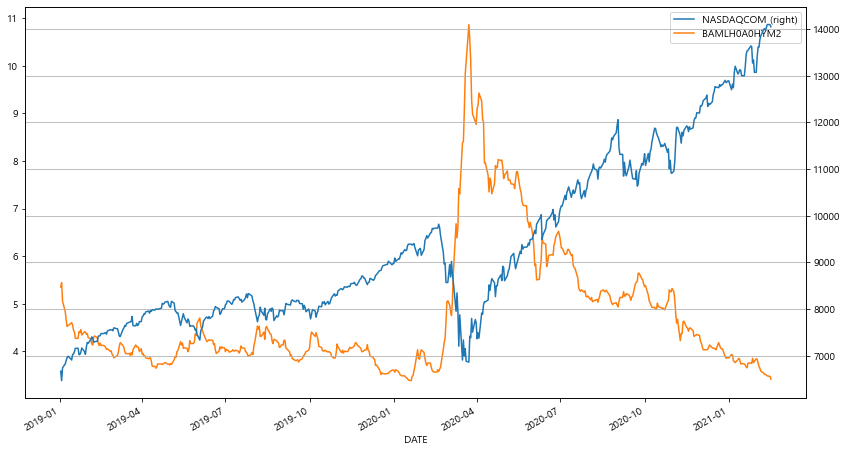

In [70]:
# 최근(2021년 1월), 나스닥지수(NASDAQCOM)와 하이일드 채권 스프레드 

df = fdr.DataReader(['NASDAQCOM', 'BAMLH0A0HYM2'], start='2019', data_source='fred')
ax = df.plot(secondary_y='NASDAQCOM')

## 다양한 지표로 예측해보는 향후 경기전망

- 주간 실업수당 청구 건수 (ICSA): 하락 -> 경기전망 긍정적
- 소비자심리지수 (UMCSENT): 하락 -> 경기전망 부정적
- 주택 판매 지수 (HSN1F) : 하락 -> 경기전망 부정적
- 실업률 (UNRATE): 하락 -> 경기전망 긍정적
- M2 통화량(M2): 상승 -> 경기전망 긍정적
- 하이일드 채권 스프레드 (BAMLH0A0HYM2): 하락 -> 경기전망 긍정적